# Using KMeans clustering to find Topics in Tweets about the Covid Vaccine

## Import needed libraries

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from datetime import datetime
from ICT_202_preprocessing import *

### Gather the Data

In [2]:
docs = pd.read_json('post_process_data.json')['content']

In [3]:
print(len(docs))
print(len(set(docs)))

27666
25579


# Create a dtm using TF\*IDF

In [3]:
from datetime import datetime
print(datetime.now())
tfidf = TfidfVectorizer()
tfidf_vecs = tfidf.fit_transform(docs)
feature_names = tfidf.get_feature_names_out()
dense = tfidf_vecs.todense()
lst1 = dense.tolist()
tfidf_df = pd.DataFrame(lst1, columns=feature_names)
terms = tfidf.get_feature_names_out()
print(datetime.now())

2022-05-24 21:03:27.855351
2022-05-24 21:04:25.007614


# K Means Clusstering of Tweets

## Find the optimal number of topics through Elbow Method

I have gone of the data that I used in the scratchpad - it is likely the results have changed since the processing method has also changed

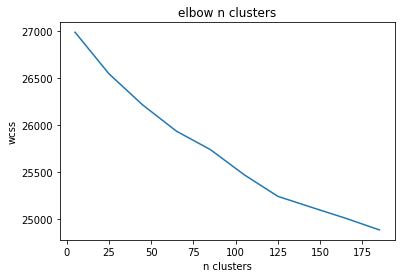

In [4]:
wcss = []
print(datetime.now())
for i in range(5,105,10):
    kmeans_model = KMeans(n_clusters=i, random_state=0)
    kmeans_model.fit_transform(tfidf_vecs)
    wcss.append(kmeans_model.inertia_)
plt.plot(range(5,105,10),wcss)
plt.title('elbow n clusters')
plt.xlabel('n clusters')
plt.ylabel('wcss')
plt.show()
print(datetime.now())

The graph has two noticable bends - The second looks too slight to be significant though

### Elbow Method - 10 to 20 clusters

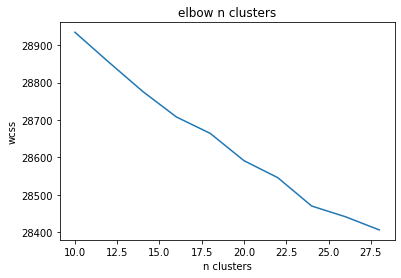

In [18]:
wcss = []
for i in range(10,30,2):
    kmeans_model = KMeans(n_clusters=i, random_state=0)
    kmeans_model.fit_transform(tfidf_vecs)
    wcss.append(kmeans_model.inertia_)
plt.plot(range(10,30,2),wcss)
plt.title('elbow n clusters')
plt.xlabel('n clusters')
plt.ylabel('wcss')
plt.show()

## Display found topics  for 24 clusters

24 looks like the most significant change, but it isnt great

In [5]:
print(datetime.now())
kmeans_model = KMeans(n_clusters=20, random_state=0)
kmeans_out = kmeans_model.fit_transform(tfidf_vecs)
print(datetime.now())
order_centroids = kmeans_model.cluster_centers_.argsort()[:, ::-1]
pd.DataFrame([[terms[i] for i in order_centroids[j]] for j in range(len(order_centroids))],
                          index=[f'Topic {x}' for x in range(20)]).iloc[:,:9]

2022-05-24 21:06:21.394031
2022-05-24 21:06:31.176926


,0,1,2,3,4,5,6,7,8
Topic 0,cause_hepatitis,global_summit_pm_modi,numerous_study_point_potentially,call_flexibility_trip_equitable,justin_trudeau_doug_ford,fight_drive,hail_indias_pandemic,numerous_studies_point_potentially,distribution_via_namo_app
Topic 1,vaccination,covid19,africas_first_covid19,factory_receive_single_order,rate,card,get,work,may
Topic 2,booster,get,shot,2nd,covid19,second,vaccinate,two,people
Topic 3,need,people,get,vaccinate,know,go,child,say,work
Topic 4,thank,dose,covid19,first,get,billion,3_crore_child_1214,age_group_administer,china_provide_22
Topic 5,risk,low,people,high,covid19,death,vaccinate,get,infection
Topic 6,take,people,office,get,biden,shot,care,trump,would
Topic 7,die,people,vaccinate,biden,many,get,trump,know,million
Topic 8,take_send_dm,get_qr_scan,passport_without_take,covid19_digital_qr,certificate_paper_card_without,covid19,usa_uk_eu_australia,canada_click_link_join,get
Topic 9,covid19,people,say,go,like,know,make,would,work


## Display top 5 tweets for some topics

In [27]:
kmeans_out.shape

(29605, 24)

In [8]:
topic_number = 4
topic = np.argsort(kmeans_out[:,topic_number])
for tweet in list(dict.fromkeys((topic[:5]))):
    print(docs[tweet])

see evidence oversight pandemic pregnant_woman initially exclude trial contribute hesitancy poor outcome pregnant_woman still see labour ward today
probably nothing prevent get spread get stupid shot booster catch give family also vaccinate comparison apple orange let state handle health care
idiot cause billion plastic disposable syringesover non threat like kill anyone healthy really think someone unhealthy vaccinated polio get polio expose early warn systemyou still kill pathogen
vaxxe boost feel liberal shoot foot position many parent probably get likely see use manadatory vaccination point game hill die
would good idea include uptakes stateterritory daily coronavirus update


# Conclusions

## Make word clouds from intersting topics found in the above data

There are too many topics to make word clouds for all of them

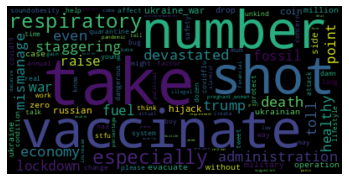

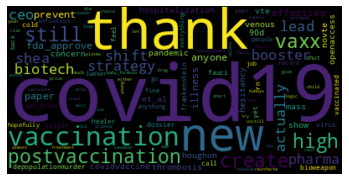

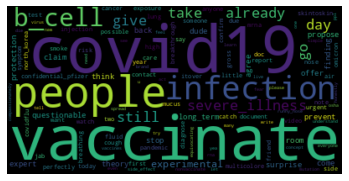

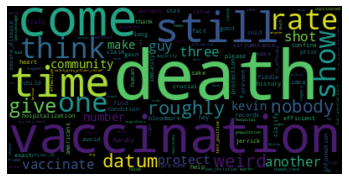

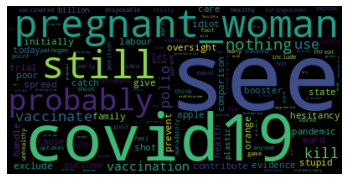

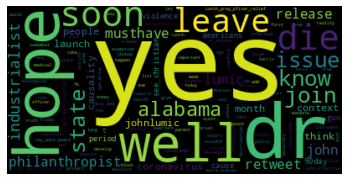

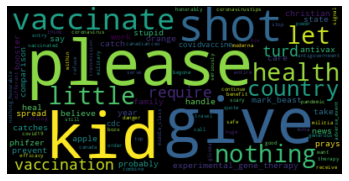

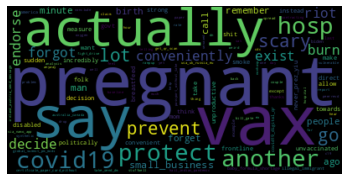

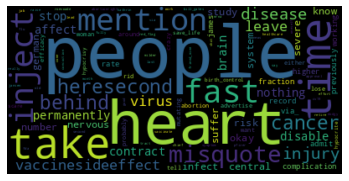

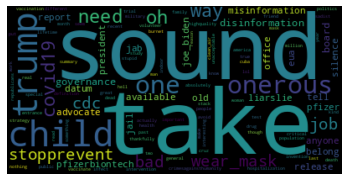

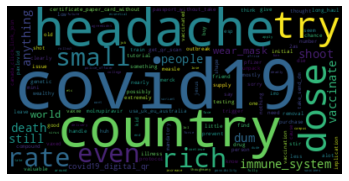

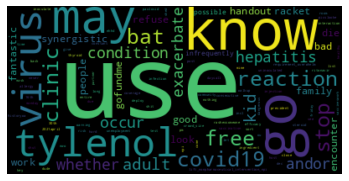

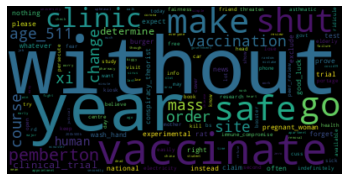

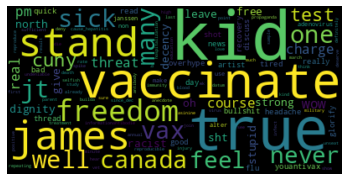

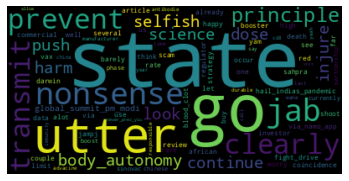

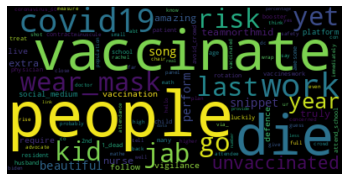

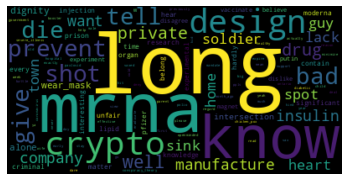

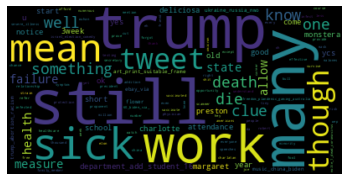

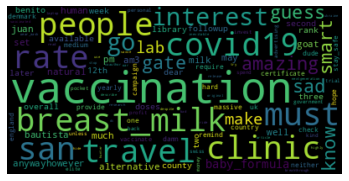

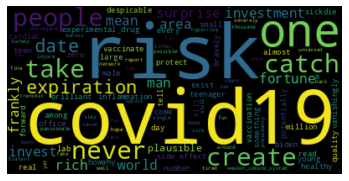

In [26]:
for i in range(20):
    cloud = WordCloud().generate('. '.join([docs[tweet] for tweet in list(dict.fromkeys((np.argsort(kmeans_out[:,i])[:10])))]))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Count Vectoriser instead of TFIDF

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime
from ICT_202_preprocessing import *

In [2]:
docs = pd.read_json('post_process_data.json')['content']

In [3]:
print(datetime.now())
vect = CountVectorizer()
bow = vect.fit_transform(docs)
feature_names = vect.get_feature_names_out()
dense = bow.todense()
lst1 = dense.tolist()
bow_df = pd.DataFrame(lst1, columns=feature_names)
print(datetime.now())

2022-05-24 21:10:16.234273
2022-05-24 21:11:30.616624


ValueError: x and y must have same first dimension, but have shapes (5,) and (10,)

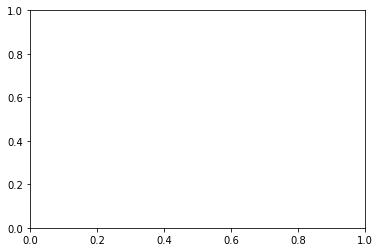

In [5]:
wcss = []
for i in range(5,105,10):
    kmeans_model = KMeans(n_clusters=i, random_state=0)
    kmeans_model.fit_transform(bow)
    wcss.append(kmeans_model.inertia_)
plt.plot(range(5,105,10),wcss)
plt.title('elbow n clusters')
plt.xlabel('n clusters')
plt.ylabel('wcss')
plt.show()

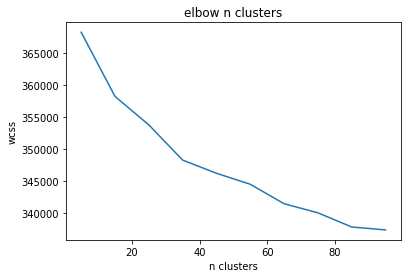

In [6]:
plt.plot(range(5,105,10),wcss)
plt.title('elbow n clusters')
plt.xlabel('n clusters')
plt.ylabel('wcss')
plt.show()

In [4]:
print(datetime.now())
kmeans_model = KMeans(n_clusters=15, random_state=0)
kmeans_out = kmeans_model.fit_transform(bow)
print(datetime.now())
order_centroids = kmeans_model.cluster_centers_.argsort()[:, ::-1]
pd.DataFrame([[feature_names[i] for i in order_centroids[j]] for j in range(len(order_centroids))],
                          index=[f'Topic {x}' for x in range(15)]).iloc[:,:9]

2022-05-24 21:12:16.196256
2022-05-24 21:12:20.576355


,0,1,2,3,4,5,6,7,8
Topic 0,great,get,people,thread,work,death,one,good,country
Topic 1,people,die,get,vaccinate,many,go,make,work,one
Topic 2,still,get,vaccinate,people,go,mask,work,take,even
Topic 3,vaccination,go,one,make,would,well,need,work,year
Topic 4,know,people,get,one,die,vaccinate,even,many,make
Topic 5,covid19,vaccination,dose,may,vaccinate,get,people,year,health
Topic 6,vaccinate,get,fully,boost,people,one,would,covid19,die
Topic 7,get,booster,vaccinate,one,go,well,shot,time,would
Topic 8,like,people,get,would,go,look,one,make,work
Topic 9,death,vaccinate,rate,covid19,cause,million,people,datum,case


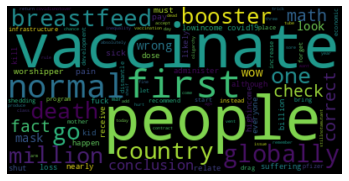

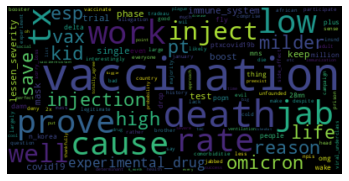

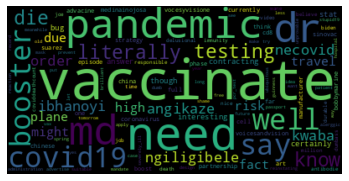

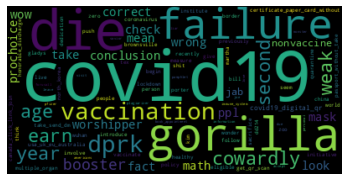

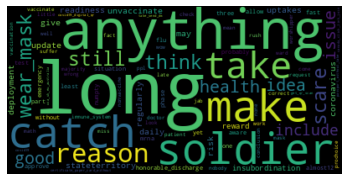

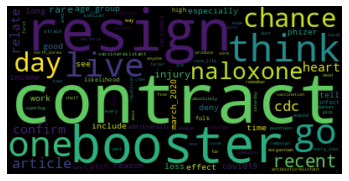

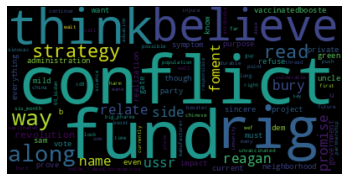

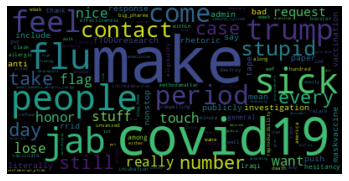

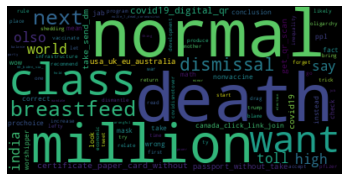

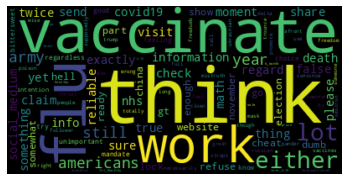

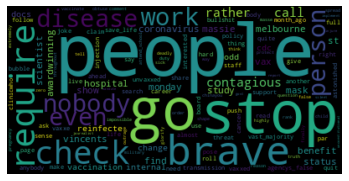

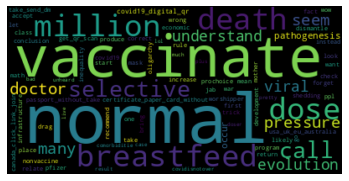

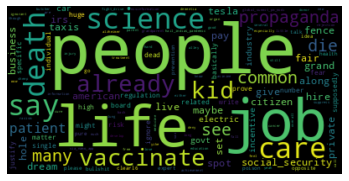

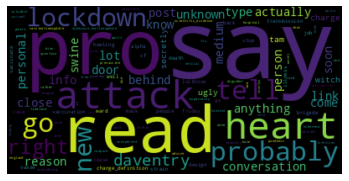

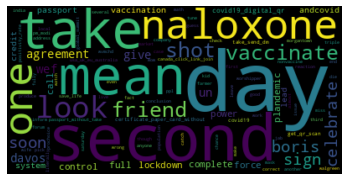

In [11]:
for i in range(15):
    cloud = WordCloud().generate('. '.join([docs[tweet] for tweet in list(dict.fromkeys((np.argsort(kmeans_out[:,i])[:10])))]))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Start over

### This model now crops duplicate tweets

In [3]:
from datetime import datetime
print(datetime.now())
tfidf = TfidfVectorizer()
tfidf_vecs = tfidf.fit_transform(set(docs))
feature_names = tfidf.get_feature_names_out()
dense = tfidf_vecs.todense()
lst1 = dense.tolist()
tfidf_df = pd.DataFrame(lst1, columns=feature_names)
terms = tfidf.get_feature_names_out()
print(datetime.now())

2022-05-29 09:56:56.479154
2022-05-29 09:57:53.026668


2022-05-29 09:57:55.287412


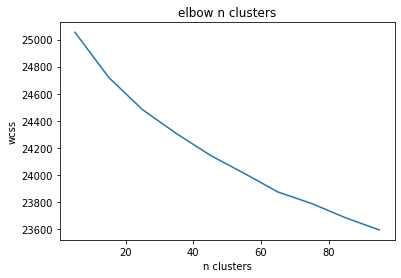

2022-05-29 10:00:57.218514


In [4]:
wcss = []
print(datetime.now())
for i in range(5,105,10):
    kmeans_model = KMeans(n_clusters=i, random_state=0)
    kmeans_model.fit_transform(tfidf_vecs)
    wcss.append(kmeans_model.inertia_)
plt.plot(range(5,105,10),wcss)
plt.title('elbow n clusters')
plt.xlabel('n clusters')
plt.ylabel('wcss')
plt.show()
print(datetime.now())

In [5]:
k = 15
print(datetime.now())
kmeans_model = KMeans(n_clusters=k, random_state=0)
kmeans_out = kmeans_model.fit_transform(tfidf_vecs)
print(datetime.now())
order_centroids = kmeans_model.cluster_centers_.argsort()[:, ::-1]
pd.DataFrame([[terms[i] for i in order_centroids[j]] for j in range(len(order_centroids))],
                          index=[f'Topic {x}' for x in range(k)]).iloc[:,:9]

2022-05-29 10:01:05.521652
2022-05-29 10:01:11.827391


,0,1,2,3,4,5,6,7,8
Topic 0,please,read,thread,whole,good,thank,worth,get,datum
Topic 1,know,people,get,vaccinate,many,one,everyone,even,want
Topic 2,would,say,get,vaccinate,people,take,think,like,know
Topic 3,well,soon,hope,feel,get,vaccinate,oh,take,sorry
Topic 4,people,take,say,work,vaccination,still,think,see,need
Topic 5,like,people,get,look,flu,sound,feel,vaccinate,work
Topic 6,go,get,people,back,still,vaccinate,work,take,say
Topic 7,child,vaccinate,parent,get,hepatitis,covid19,age,young,year
Topic 8,vaccinate,get,boost,fully,people,still,wear_mask,catch,never
Topic 9,one,get,vaccinate,take,people,two,booster,vaccination,still


## Fine tune k

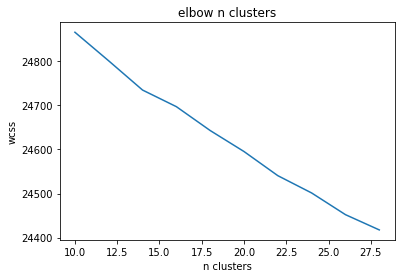

In [6]:
wcss = []
for i in range(10,30,2):
    kmeans_model = KMeans(n_clusters=i, random_state=0)
    kmeans_model.fit_transform(tfidf_vecs)
    wcss.append(kmeans_model.inertia_)
plt.plot(range(10,30,2),wcss)
plt.title('elbow n clusters')
plt.xlabel('n clusters')
plt.ylabel('wcss')
plt.show()

# Testing three distinct topics

In [5]:
docs = list(pd.read_json('post_process_data.json')['content'][:1000])
docs.extend(list(pd.read_json('ukraine_processed.json')['content'][:1000]))
docs.extend(list(pd.read_json('monkeypox_processed.json')['content'][:1000]))

In [6]:
print(datetime.now())
tfidf = TfidfVectorizer()
tfidf_vecs = tfidf.fit_transform(set(docs))
feature_names = tfidf.get_feature_names_out()
dense = tfidf_vecs.todense()
lst1 = dense.tolist()
tfidf_df = pd.DataFrame(lst1, columns=feature_names)
terms = tfidf.get_feature_names_out()
print(datetime.now())

2022-05-29 14:27:31.074627
2022-05-29 14:27:32.960843


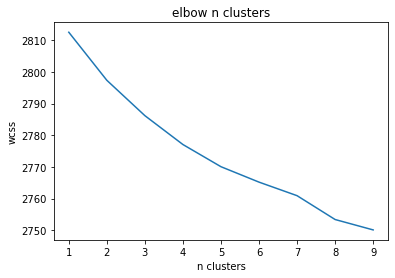

In [7]:
wcss = []
for i in range(1,10):
    kmeans_model = KMeans(n_clusters=i, random_state=0)
    kmeans_model.fit_transform(tfidf_vecs)
    wcss.append(kmeans_model.inertia_)
plt.plot(range(1,10),wcss)
plt.title('elbow n clusters')
plt.xlabel('n clusters')
plt.ylabel('wcss')
plt.show()

In [10]:
kmeans_model = KMeans(n_clusters=3, random_state=0)
kmeans_out = kmeans_model.fit_transform(tfidf_vecs)

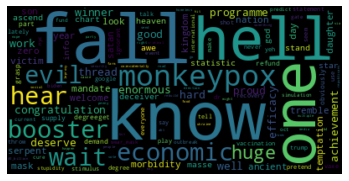

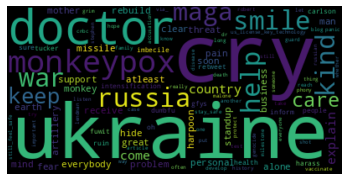

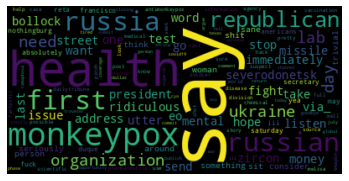

In [11]:
for i in range(3):
    cloud = WordCloud().generate('. '.join([docs[tweet] for tweet in list(dict.fromkeys((np.argsort(kmeans_out[:,i])[:10])))]))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [15]:
order_centroids = kmeans_model.cluster_centers_.argsort()[:, ::-1]
pd.DataFrame([[feature_names[i] for i in order_centroids[j]] for j in range(len(order_centroids))],
                          index=[f'Topic {x}' for x in range(3)]).iloc[:,:20]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Topic 0,get,people,vaccinate,go,like,one,say,know,covid19,well,still,need,vaccination,death,make,would,take,die,think,many
Topic 1,ukraine,russia,war,putin,russian,country,ukrainian,would,weapon,say,give,china,want,go,nato,make,need,help,like,think
Topic 2,monkeypox,case,outbreak,get,know,spread,virus,first,news,via,report,say,world,disease,pandemic,new,health,take,smallpox,people


In [18]:
[docs[tweet] for tweet in list(dict.fromkeys((np.argsort(kmeans_out[:,0])[:10])))]

['huge congratulation enormous achievement programme hard work well deserve winner proud',
 'good thread efficacy morbidity look mask mandate day',
 'hell satan welcome year zero tremble nation kingdom fall one one victim fall temptation daughter fall son ancient serpent deceiver masse stand awe ascend heaven star god',
 'monkeypox statistic chart info',
 'economic degreeget refund obviously grasp part supply demand vaccination stimulus play economic recovery google pretend use degree throw make ignorant statement',
 'seem like everyone hear get lately get booster never hear get shot know talk dr get booster say wait fall would know',
 'yeh trump tell get vaxe wear_mask biden cure stupidity',
 'international simulation predict current monkeypox outbreak know gate fund event nyc oct coincidentally right b4 hit people r evil criminal way abt via',
 'know leprosy monkeypox something might happen election multiple social media',
 'nope evil republicans party vote send 40_billion ukraine bo

In [19]:
[docs[tweet] for tweet in list(dict.fromkeys((np.argsort(kmeans_out[:,1])[:10])))]

['problem smile everybody smile cry cry cry alone personal pain atleast cry help clear mind mother earth support man soon standup rebuild ukraine',
 'monkeypox monkey business hide great threat',
 'russia ukraine war artillery harpoon missile receive ukraine fear intensification war russia',
 'oh sure doctor kind maga dumbfu doctor harass doctor keep people inform kind imbecile doctor retweet tucker carlson keep ruin health care country gfys maga fuwit',
 'us_license_key_technology country develop shot cnbc',
 'history monkeypox thing know',
 'case someone try panic listen dr robert malone explain monkeypox really via_',
 'reach another grim milestone death let put guard come long way still important get vaccinate get test often protect family',
 'stay_safe everyone take care hope article also help explain whether still_feel_safe disease come one',
 'phony accusation russian genocide ukraine stephen lendman blog']

In [20]:
[docs[tweet] for tweet in list(dict.fromkeys((np.argsort(kmeans_out[:,2])[:10])))]

['russia test zircon missile street fight severodonetsk russian via_',
 'utter bollock first last word',
 'hope republican president immediately stop send money ridiculous organization one first eo',
 'listen republicans go say need address mental health issue want take seriously need something woman sane person sit around day think trivial shit like',
 'consider monkeypox nothingburg americans would absolutely reta yea fuck',
 'health secretary francisco duque iii saturday may say pharmaceutical division agency seek help world health organization look possible source antimonkeypox shot full story monkeypox dailytribune',
 'well russia suspect hack lab pinch vaccination information know medical disease scientific lab chemical weapon ukraine pretty sure would use russian soldier rest case',
 'post melisa fantastic opportunity say goodbye twitter today day comment argue german ukraine war totally tired closing phase ill publish channel way cya',
 'africa commit achieve coverage ramaphosa